# 逻辑斯蒂回归

## 【关键词】Logistics函数，最大似然估计，梯度下降法

## 1、Logistics回归的原理

利用Logistics回归进行分类的主要思想是：根据现有数据对分类边界线建立回归公式，以此进行分类。这里的“回归” 一词源于最佳拟合，表示要找到最佳拟合参数集。

训练分类器时的做法就是寻找最佳拟合参数，使用的是最优化算法。接下来介绍这个二值型输出分类器的数学原理

Logistic Regression和Linear Regression的原理是相似的，可以简单的描述为这样的过程：

（1）找一个合适的预测函数，一般表示为h函数，该函数就是我们需要找的分类函数，它用来预测输入数据的判断结果。这个过程是非常关键的，需要对数据有一定的了解或分析，知道或者猜测预测函数的“大概”形式，比如是线性函数还是非线性函数。

（2）构造一个Cost函数（损失函数），该函数表示预测的输出（h）与训练数据类别（y）之间的偏差，可以是二者之间的差（h-y）或者是其他的形式。综合考虑所有训练数据的“损失”，将Cost求和或者求平均，记为J(θ)函数，表示所有训练数据预测值与实际类别的偏差。

（3）显然，J(θ)函数的值越小表示预测函数越准确（即h函数越准确），所以这一步需要做的是找到J(θ)函数的最小值。找函数的最小值有不同的方法，Logistic Regression实现时有梯度下降法（Gradient Descent）。


### 1)  构造预测函数

Logistic Regression虽然名字里带“回归”，但是它实际上是一种分类方法，用于两分类问题（即输出只有两种）。首先需要先找到一个预测函数（h），显然，该函数的输出必须是两类值（分别代表两个类别），所以利用了*Logistic函数（或称为Sigmoid函数）*，函数形式为：

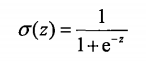

该函数形状为：

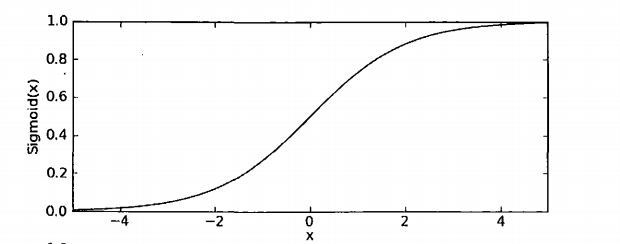

预测函数可以写为：

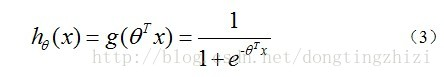

### 2）构造损失函数

Cost函数和J(θ)函数是基于*最大似然估计*推导得到的。

每个样本属于其真实标记的概率，即似然函数，可以写成：

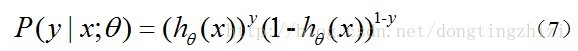

所有样本都属于其真实标记的概率为

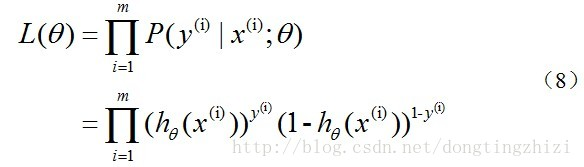

对数似然函数为

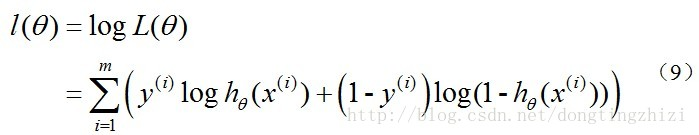

最大似然估计就是要求得使l(θ)取最大值时的θ，其实这里可以使用梯度上升法求解，求得的θ就是要求的最佳参数

### 3) 梯度下降法求J(θ)的最小值

求J(θ)的最小值可以使用*梯度下降法*，根据梯度下降法可得θ的更新过程:

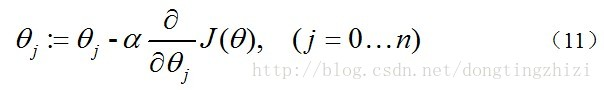

式中为α学习步长，下面来求偏导：

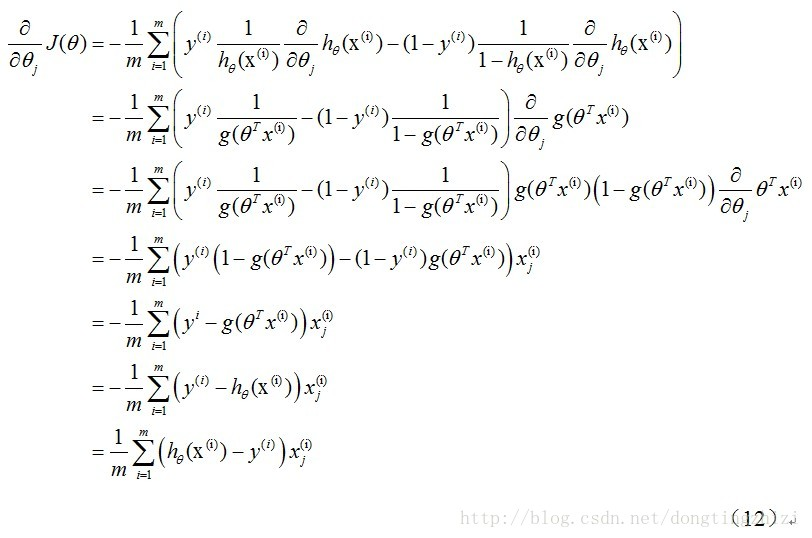

上式求解过程中用到如下的公式：

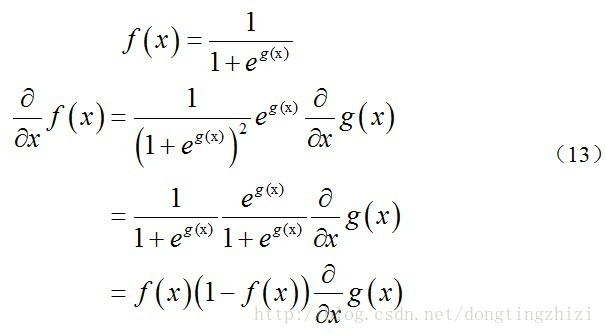

因此，θ的更新过程可以写成:

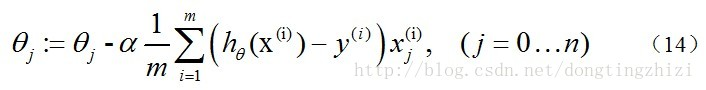

因为式中α本来为一常量，所以1/m一般将省略，所以最终的θ更新过程为：

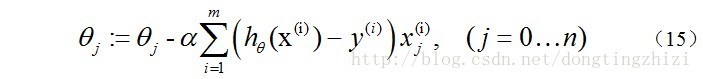

## 2、实战

`
sklearn.linear_model.LogisticRegression(penalty='l2', dual=False, tol=0.0001, C=1.0, fit_intercept=True, intercept_scaling=1, class_weight=None, random_state=None, solver='liblinear', max_iter=100, multi_class='ovr', verbose=0, warm_start=False, n_jobs=1)
`

solver参数的选择：
- “liblinear”：小数量级的数据集
- “lbfgs”, “sag” or “newton-cg”：大数量级的数据集以及多分类问题
- “sag”：极大的数据集

### 1) 手写数字数据集的分类

使用KNN与Logistic回归两种方法

In [1]:
import numpy as np
import sklearn.datasets as datasets

#回归，----->使用回归的原理进行分类
from sklearn.linear_model import LogisticRegression

In [2]:
digits = datasets.load_digits()
digits

{'DESCR': "Optical Recognition of Handwritten Digits Data Set\n===================================================\n\nNotes\n-----\nData Set Characteristics:\n    :Number of Instances: 5620\n    :Number of Attributes: 64\n    :Attribute Information: 8x8 image of integer pixels in the range 0..16.\n    :Missing Attribute Values: None\n    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)\n    :Date: July; 1998\n\nThis is a copy of the test set of the UCI ML hand-written digits datasets\nhttp://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits\n\nThe data set contains images of hand-written digits: 10 classes where\neach class refers to a digit.\n\nPreprocessing programs made available by NIST were used to extract\nnormalized bitmaps of handwritten digits from a preprinted form. From a\ntotal of 43 people, 30 contributed to the training set and different 13\nto the test set. 32x32 bitmaps are divided into nonoverlapping blocks of\n4x4 and the number of on pixels ar

In [3]:
x_data = digits.data
y_target = digits.target

In [4]:
x_data.shape

(1797, 64)

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

In [13]:
y_target[6]

6

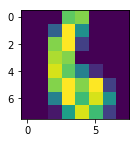

In [14]:
plt.figure(figsize=(2,2))
plt.imshow(x_data[6].reshape((8,8)))

In [17]:
from sklearn.model_selection import train_test_split
X_train,x_test,y_train ,y_test = train_test_split(x_data,y_target,test_size = 0.1)

导入数据load_digits()

创建模型，训练和预测

In [18]:
logistic = LogisticRegression()

logistic.fit(X_train,y_train)


logistic.score(x_test,y_test)

0.94999999999999996

In [19]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()

knn.fit(X_train,y_train)

knn.score(x_test,y_test)

0.97777777777777775

### 2) 使用make_blobs产生数据集进行分类

导包使用datasets.make_blobs创建一系列点

In [20]:
import sklearn.datasets as datasets

In [25]:
x_data,y_target = datasets.make_blobs(n_samples= 200,centers = 4)

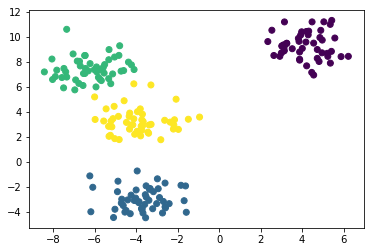

In [26]:
plt.scatter(x_data[:,0],x_data[:,1],c = y_target)

设置三个中心点，随机创建100个点

创建机器学习模型，训练数据

In [27]:
logistic = LogisticRegression()

logistic.fit(x_data,y_target)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

提取坐标点，对坐标点进行处理

In [28]:
xmin,xmax = x_data[:,0].min(),x_data[:,0].max()
ymin,ymax = x_data[:,1].min(),x_data[:,1].max()

In [29]:
x = np.linspace(xmin,xmax,1000)

y = np.linspace(ymin,ymax,1000)

xx,yy = np.meshgrid(x,y)

In [30]:
#实现点的交叉
xy = np.c_[xx.ravel(),yy.ravel()]

In [31]:
xy.shape

(1000000, 2)

In [32]:
y_ = logistic.predict(xy)
y_

array([1, 1, 1, ..., 0, 0, 0])

预测坐标点数据，并进行reshape()

绘制图形

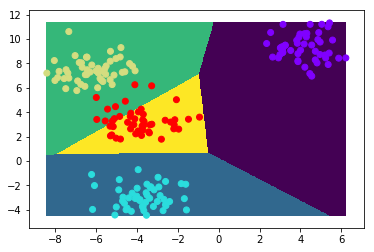

In [36]:
plt.pcolormesh(xx,yy,y_.reshape(yy.shape))

plt.scatter(x_data[:,0],x_data[:,1],c = y_target,cmap = 'rainbow')


## 3、作业

#### 【第1题】预测年收入是否大于50K美元

读取adult.txt文件，并使用逻辑斯底回归算法训练模型，根据种族、职业、工作时长来预测一个人的性别

#### 【第2题】从疝气病症预测病马的死亡率